In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents_March23.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(7728394, 46)

In [4]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df = df[['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 
    #'Start_Lat',
       #'Start_Lng', 'End_Lat', 'End_Lng', 
    'Distance(mi)', 'Description',
       'Street', 'City', 
    #'County', 
    'State', 
    #'Zipcode', 
    'Country', 
    #'Timezone',
       #'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       #'Humidity(%)', 'Pressure(in)', 
    'Visibility(mi)', 
    #'Wind_Direction',
       #'Wind_Speed(mph)', 'Precipitation(in)', 
    'Weather_Condition', 
    #'Amenity',
       #'Bump', 
    'Crossing',
    #'Give_Way', 
    'Junction', 
    #'No_Exit', 
    #'Railway',
      # 'Roundabout', 'Station', 'Stop', 
    #'Traffic_Calming', 
    'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset',
    #'Civil_Twilight', 'Nautical_Twilight',
     #  'Astronomical_Twilight'
   ]]

In [8]:
df.shape

(7728394, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Source             object 
 2   Severity           int64  
 3   Start_Time         object 
 4   End_Time           object 
 5   Distance(mi)       float64
 6   Description        object 
 7   Street             object 
 8   City               object 
 9   State              object 
 10  Country            object 
 11  Visibility(mi)     float64
 12  Weather_Condition  object 
 13  Crossing           bool   
 14  Junction           bool   
 15  Traffic_Signal     bool   
 16  Turning_Loop       bool   
 17  Sunrise_Sunset     object 
dtypes: bool(4), float64(2), int64(1), object(11)
memory usage: 855.0+ MB


In [10]:
df.isna().sum()

ID                        0
Source                    0
Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
Description               5
Street                10869
City                    253
State                     0
Country                   0
Visibility(mi)       177098
Weather_Condition    173459
Crossing                  0
Junction                  0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset        23246
dtype: int64

In [11]:
df['Description'].unique()

array(['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.',
       'Accident on Brice Rd at Tussing Rd. Expect delays.',
       'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.',
       ..., 'Ramp closed to Bristol St - Road closed due to accident.',
       'At Friars Rd - Accident. Center lane blocked.',
       'Ramp closed to The City Dr/Exit 14A - Road closed due to accident.'],
      dtype=object)

In [12]:
df['Description'].value_counts()

Description
A crash has occurred causing no to minimum delays. Use caution.                                        9593
Accident                                                                                               6616
An unconfirmed report of a crash has been received. Use caution.                                       3799
A crash has occurred use caution.                                                                      2894
A crash has occurred with minimal delay to traffic. Prepare to slow or move over for worker safety.    2672
                                                                                                       ... 
Accident on 49th St at Odell St.                                                                          1
Accident on Royal Ascot Ave at Coursey Blvd.                                                              1
Accident on LA-3245 O'neal Ln at I-12.                                                                    1
Accident on Rive

In [13]:
df.drop(columns = {'Description','Street'}, inplace = True)

In [14]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Distance(mi),City,State,Country,Visibility(mi),Weather_Condition,Crossing,Junction,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Dayton,OH,US,10.0,Light Rain,False,False,False,False,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Reynoldsburg,OH,US,10.0,Light Rain,False,False,False,False,Night
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Williamsburg,OH,US,10.0,Overcast,False,False,True,False,Night
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Dayton,OH,US,9.0,Mostly Cloudy,False,False,False,False,Night
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Dayton,OH,US,6.0,Mostly Cloudy,False,False,True,False,Day


In [15]:
df['Source'].value_counts()

Source
Source1    4325632
Source2    3305373
Source3      97389
Name: count, dtype: int64

In [16]:
df.isna().sum()

ID                        0
Source                    0
Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
City                    253
State                     0
Country                   0
Visibility(mi)       177098
Weather_Condition    173459
Crossing                  0
Junction                  0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset        23246
dtype: int64

In [17]:
df['City'].unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [18]:
df['City'].value_counts()

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [19]:
df['City'].fillna(value = 'Miami', inplace = True)

In [20]:
df['City'].isna().sum()

0

In [21]:
df.isna().sum()

ID                        0
Source                    0
Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
City                      0
State                     0
Country                   0
Visibility(mi)       177098
Weather_Condition    173459
Crossing                  0
Junction                  0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset        23246
dtype: int64

In [22]:
df.dropna(how = 'all', inplace = True)

In [23]:
df.isna().sum()

ID                        0
Source                    0
Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
City                      0
State                     0
Country                   0
Visibility(mi)       177098
Weather_Condition    173459
Crossing                  0
Junction                  0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset        23246
dtype: int64

In [24]:
df['Visibility(mi)'].nunique()

92

In [25]:
df['Visibility(mi)'].value_counts()

Visibility(mi)
10.0     6070231
7.0       217027
9.0       188529
8.0       149975
5.0       144153
          ...   
78.0           1
101.0          1
72.0           1
67.0           1
43.0           1
Name: count, Length: 92, dtype: int64

In [26]:
avg = np.mean(df['Visibility(mi)'])

In [27]:
df['Visibility(mi)'].fillna(value = avg, inplace = True)

In [28]:
df['Visibility(mi)'].astype('int')

0          10
1          10
2          10
3           9
4           6
           ..
7728389    10
7728390    10
7728391    10
7728392    10
7728393     7
Name: Visibility(mi), Length: 7728394, dtype: int32

In [29]:
df.isna().sum()

ID                        0
Source                    0
Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
City                      0
State                     0
Country                   0
Visibility(mi)            0
Weather_Condition    173459
Crossing                  0
Junction                  0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset        23246
dtype: int64

In [30]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [31]:
df['Weather_Condition'].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

In [32]:
df['Weather_Condition'].fillna(value = 'Fair', inplace = True)

In [33]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Distance(mi)             0
City                     0
State                    0
Country                  0
Visibility(mi)           0
Weather_Condition        0
Crossing                 0
Junction                 0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset       23246
dtype: int64

In [34]:
df['Sunrise_Sunset'].unique()

array(['Night', 'Day', nan], dtype=object)

In [35]:
df['Sunrise_Sunset'].value_counts()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

In [36]:
df['Sunrise_Sunset'].fillna(value = 'Day', inplace = True)

In [37]:
df.isna().sum()

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Distance(mi)         0
City                 0
State                0
Country              0
Visibility(mi)       0
Weather_Condition    0
Crossing             0
Junction             0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

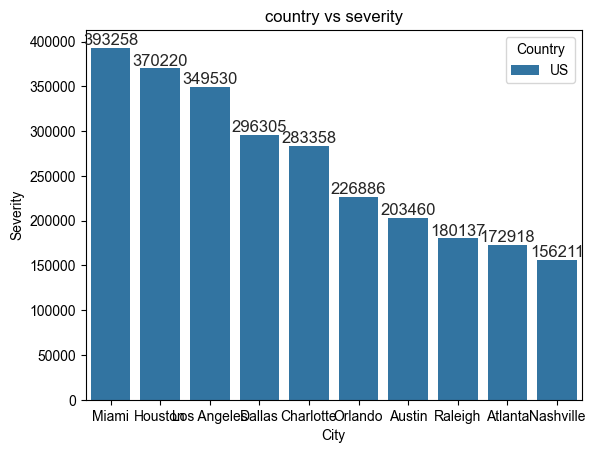

In [38]:
ax = df.groupby(['Country','City'], as_index = False)['Severity'].sum().sort_values(by = 'Severity', ascending = False).head(10)
ax = sns.barplot(x = 'City', y = 'Severity', hue = 'Country', data = ax)
ax.set_title('country vs severity')
sns.set(rc={'figure.figsize':(12,8)})
for bars in ax.containers:
    ax.bar_label(bars)

In [39]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'City', 'State', 'Country', 'Visibility(mi)', 'Weather_Condition',
       'Crossing', 'Junction', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

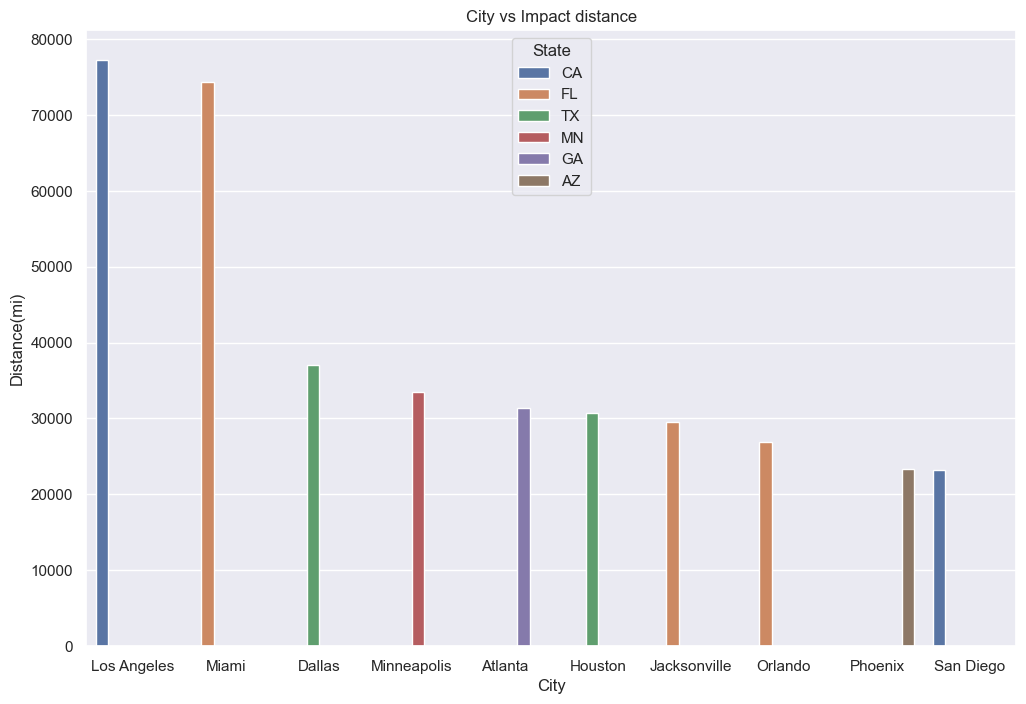

In [40]:
ax = df.groupby(['State', 'City'], as_index = False)['Distance(mi)'].sum().sort_values(by = 'Distance(mi)', ascending = False).head(10)
sns.barplot(x = 'City', y = 'Distance(mi)', hue = 'State', data = ax).set(title = 'City vs Impact distance')
sns.set(rc={'figure.figsize':(12,8)})

In [41]:
df['Weather_Condition'].nunique()

144

<Axes: xlabel='State', ylabel='Visibility(mi)'>

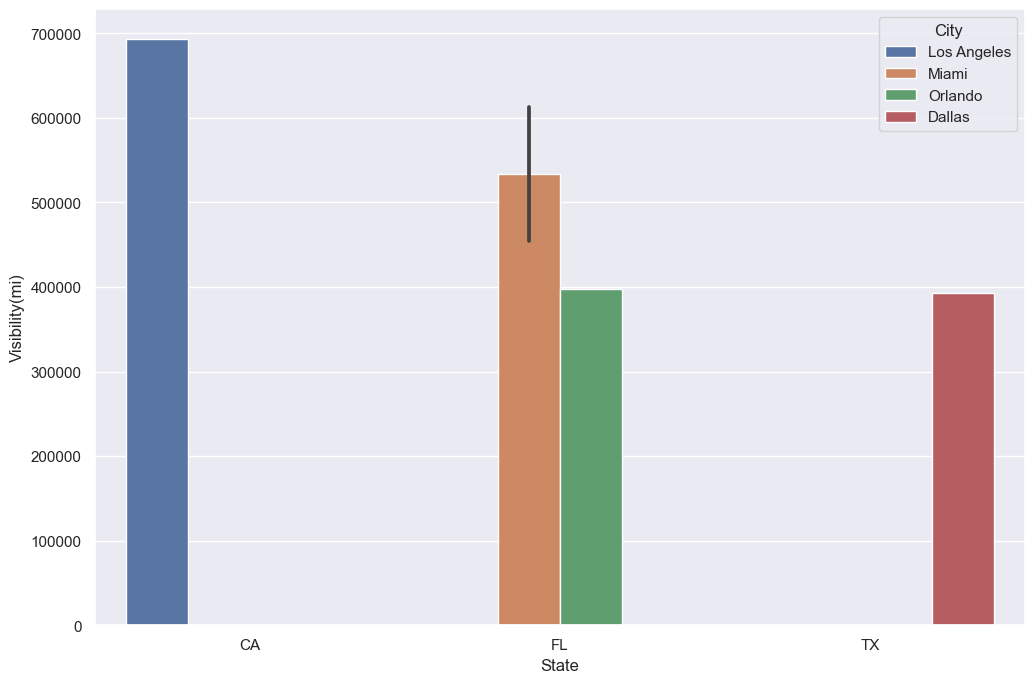

In [42]:
ax = df.groupby(['City', 'Weather_Condition', 'State'], as_index = False)['Visibility(mi)'].sum().sort_values(by = 'Visibility(mi)',ascending = False).head(5)
sns.barplot(x = 'State', y = 'Visibility(mi)', hue = 'City', data = ax)

<Axes: xlabel='Visibility(mi)', ylabel='Weather_Condition'>

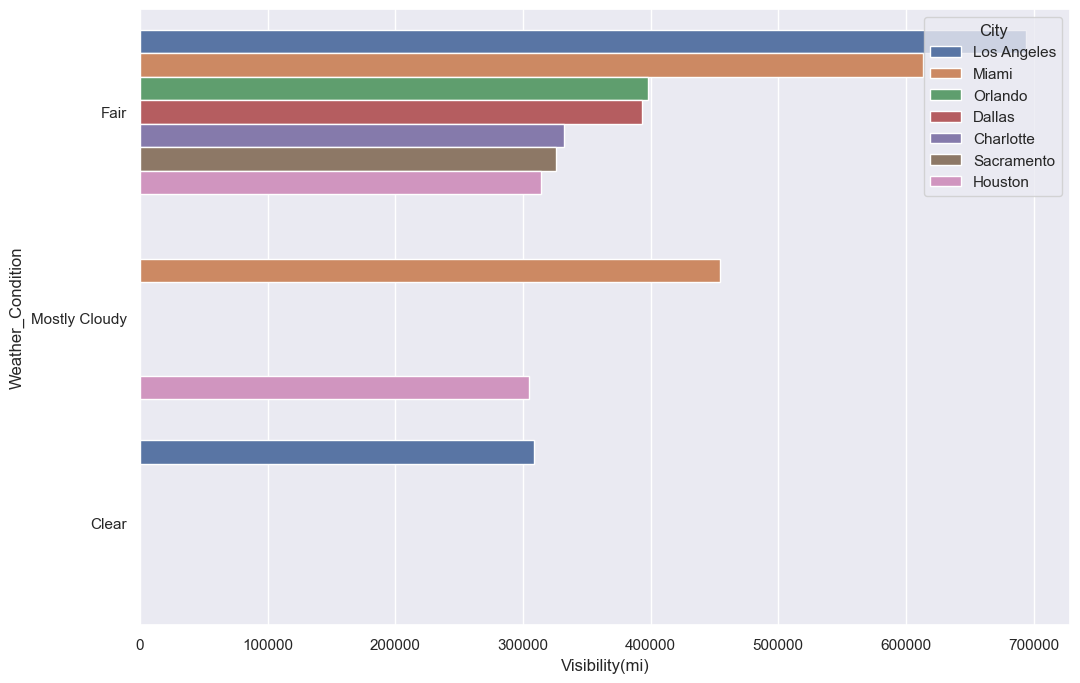

In [43]:
ax = df.groupby(['City', 'Weather_Condition', 'State'], as_index = False)['Visibility(mi)'].sum().sort_values(by = 'Visibility(mi)',ascending = False).head(10)
sns.barplot(x = 'Visibility(mi)', y = 'Weather_Condition', hue = 'City', data = ax)

In [49]:
df[df['Weather_Condition']== 'Light Rain']

,ID,Source,Severity,Start_Time,End_Time,Distance(mi),City,State,Country,Visibility(mi),Weather_Condition,Crossing,Junction,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.010,Dayton,OH,US,10.0,Light Rain,False,False,False,False,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.010,Reynoldsburg,OH,US,10.0,Light Rain,False,False,False,False,Night
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.010,Westerville,OH,US,7.0,Light Rain,False,False,False,False,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,0.010,Westerville,OH,US,3.0,Light Rain,False,False,False,False,Day
11,A-12,Source2,3,2016-02-08 08:21:27,2016-02-08 08:51:27,0.010,Reynoldsburg,OH,US,3.0,Light Rain,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728003,A-7777371,Source1,2,2019-08-23 14:00:27,2019-08-23 14:30:11,0.157,Staten Island,NY,US,10.0,Light Rain,False,False,False,False,Day
7728004,A-7777372,Source1,2,2019-08-23 14:16:17,2019-08-23 14:43:57,0.299,Wilmington,DE,US,7.0,Light Rain,False,False,False,False,Day
7728009,A-7777377,Source1,2,2019-08-23 16:44:35,2019-08-23 17:13:30,0.205,Manahawkin,NJ,US,10.0,Light Rain,False,False,False,False,Day
7728037,A-7777405,Source1,4,2019-08-23 19:08:30,2019-08-23 19:37:17,0.164,Smithfield,VA,US,10.0,Light Rain,False,False,False,False,Day
